In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
# 1. 데이터 로드
iris = load_iris()

In [3]:
# 입력 데이터 (특징)
X = iris.data

In [4]:
# 출력 데이터 (레이블: 꽃의 종류)
y = iris.target

In [5]:
# 2. 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
# 3. 의사결정 나무 모델 생성 및 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
# 4. 테스트 데이터로 예측
y_pred = model.predict(X_test)

In [8]:
# 5. 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy * 100:.2f}%")

모델 정확도: 100.00%


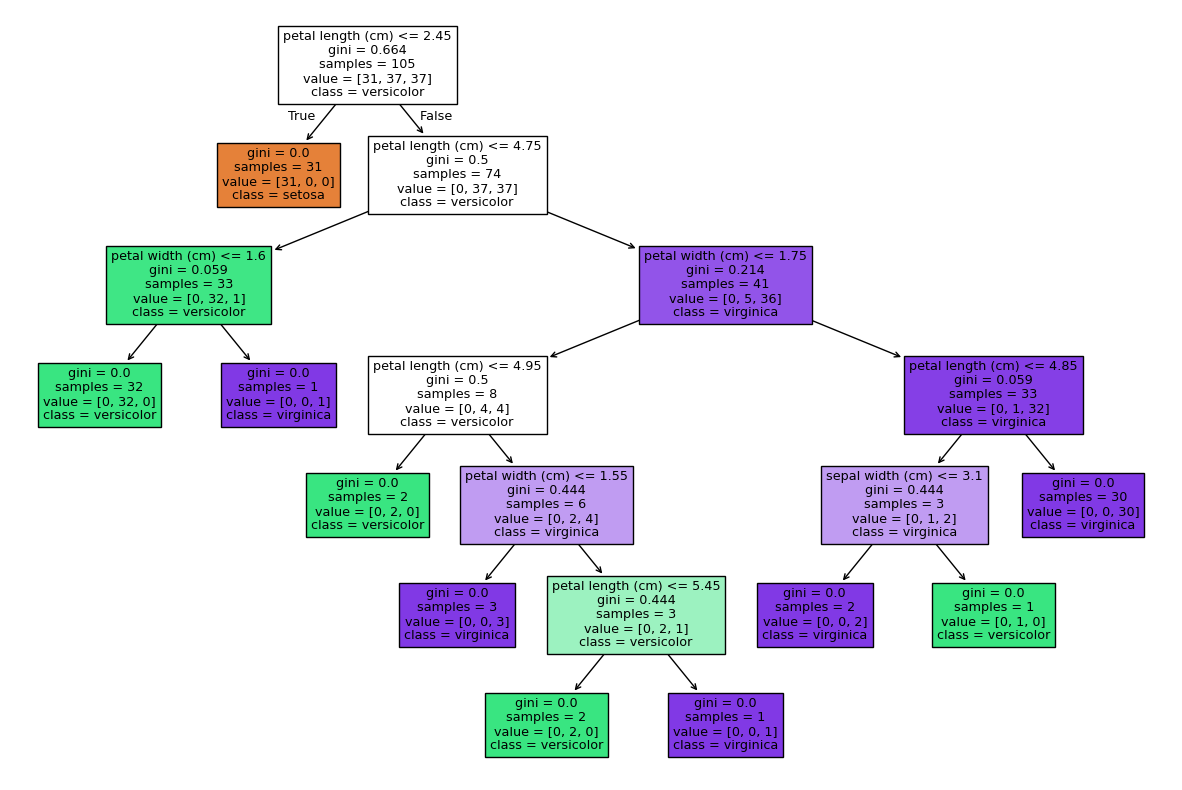

In [9]:
# 6. 시각화 (트리 구조)
plt.figure(figsize=(15, 10))
tree.plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

In [10]:
# 7. 새로운 데이터 예측
new_sample = [[5.1, 3.5, 1.4, 0.2]]  # 예: 꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비
predicted_class = model.predict(new_sample)
print(f"새로운 데이터의 예측 결과: {iris.target_names[predicted_class[0]]}")

새로운 데이터의 예측 결과: setosa


트리 시각화에서 각 노드에 표시된 값들을 설명드리겠습니다. 각 노드는 특정 조건을 기준으로 데이터를 분할하며, 중요한 정보들이 포함되어 있습니다. 예제를 통해 하나씩 살펴보겠습니다.

### 노드의 각 요소 설명

1. **조건 (조건식)**:
   - 각 노드의 최상단에는 데이터를 분할하기 위한 조건이 나옵니다.
   - 예를 들어, `petal length (cm) <= 2.45`는 "꽃잎 길이가 2.45cm 이하인가?"라는 조건입니다.
   - 이 조건에 따라 데이터가 "True"와 "False"로 나뉩니다.

2. **gini**:
   - **지니 계수 (Gini Impurity)**는 해당 노드에서 데이터가 얼마나 불순한지를 나타냅니다.
   - 값이 0이면 데이터가 완벽하게 분류된 상태이고, 값이 1에 가까울수록 혼합 상태가 심한 것입니다.
   - 예를 들어, `gini = 0.664`은 데이터의 불순도가 66.4%임을 의미합니다.

3. **samples**:
   - 이 노드에 포함된 **샘플 개수**를 나타냅니다.
   - 예를 들어, `samples = 105`는 이 노드에 105개의 데이터 포인트가 있음을 나타냅니다.

4. **value**:
   - `value = [31, 37, 37]`은 이 노드에 있는 샘플들이 각 클래스에 얼마나 속하는지를 보여줍니다.
   - 이 예시에서는 `31개는 setosa`, `37개는 versicolor`, `37개는 virginica`입니다.
   - 즉, 이 노드에는 `setosa`, `versicolor`, `virginica` 클래스가 고르게 분포되어 있습니다.

5. **class**:
   - 이 노드에서 가장 많은 샘플이 속하는 **클래스**입니다.
   - 예를 들어, `class = versicolor`는 이 노드에서 `versicolor`가 가장 많은 클래스임을 의미합니다.

---

### 예제 노드 해석

- **첫 번째 노드**: `petal length (cm) <= 2.45`
  - `gini = 0.664`: 불순도가 66.4%로, 데이터가 어느 정도 섞여 있습니다.
  - `samples = 105`: 총 105개의 데이터 포인트가 이 노드에 포함되어 있습니다.
  - `value = [31, 37, 37]`: 이 노드에는 `setosa 31개`, `versicolor 37개`, `virginica 37개`가 있습니다.
  - `class = versicolor`: 가장 많은 클래스는 `versicolor`입니다.

- **True로 분기된 왼쪽 노드**:
  - `gini = 0.0`: 불순도가 0이므로, 데이터가 완벽하게 분류되어 있습니다.
  - `samples = 31`: 31개의 샘플이 있습니다.
  - `value = [31, 0, 0]`: 이 노드에는 `setosa` 31개만 있고, 다른 클래스는 없습니다.
  - `class = setosa`: 이 노드의 샘플은 모두 `setosa`이므로 이 클래스가 할당됩니다.

- **False로 분기된 오른쪽 노드**:
  - `gini = 0.5`: 불순도가 50%로, 데이터가 일부 섞여 있습니다.
  - `samples = 74`: 74개의 샘플이 있습니다.
  - `value = [0, 37, 37]`: `versicolor 37개`, `virginica 37개`가 있습니다.
  - `class = versicolor`: 가장 많은 클래스는 `versicolor`입니다.

이런 식으로 각 노드를 해석하면, 트리에서 어떻게 데이터를 분류하고 있는지 이해할 수 있습니다.